# Определение перспективного тарифа для телеком-компании

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файлов

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats as st

calls = pd.read_csv('calls.csv')#/datasets/calls.csv
display(calls.info())
display(calls.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
internet = pd.read_csv('internet.csv')
display(internet.info())
display(internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
messages = pd.read_csv('messages.csv')
display(messages.info())
display(messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
tariffs = pd.read_csv('tariffs.csv')
display(tariffs.info())
display(tariffs.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users = pd.read_csv('users.csv')
display(users.info())
display(users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Вывод изучения данных

В принципе данные понятные, сомнительный столбец id там где он есть и user_id, но с ними справимся далее, пропусков нет(кроме churn_date), типы данных поменяем дальше. Вижу в таблице internet ненужный столбец Unnamed: 0 (это просто технический артефакт). Менять будем только тип в датах, чтобы потом сгруппировать по месяцу. Пропуски в принципе можно не заполнять, они есть только в одном столбце(churn_date) и имеют смысл(нет даты прекращения пользования тарифом, потому что пользователь не прекратил пользование тарифом).

Согласно документации к данным:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Предварительно можно утверждать, что данных достаточно для проведения статистического анализа.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных (замена типов, ошибки, заполнение пропусков и т.д.)

In [8]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month#берем только месяц, потому что анализ будет по месяцам
calls.info()
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'].sort_values().value_counts()#округляем в большую сторону по условиям Мегалайна

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


0.0     39613
7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
12.0     8448
1.0      8402
13.0     7486
14.0     6554
15.0     5505
16.0     4551
17.0     3671
18.0     2984
19.0     2411
20.0     1806
21.0     1304
22.0      975
23.0      720
24.0      468
25.0      363
26.0      257
27.0      151
28.0      104
29.0       56
30.0       39
31.0       30
32.0       17
33.0       10
35.0        5
34.0        3
36.0        2
37.0        2
38.0        2
Name: duration, dtype: int64

In [9]:
users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [10]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month#берем только месяц, потому что анализ будет по месяцам
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [11]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month#берем только месяц, потому что анализ будет по месяцам
internet['mb_used'] = internet['mb_used'].apply(np.ceil)#округляем в большую сторону по условиям Мегалайна
internet['mb_used'].sort_values().value_counts()

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


Теперь соединяем таблицы по такой логике: сначала сгруппируем по паре пользователь+месяц, а потом объединим с помощью merge c how = 'outer'. Получается как-то так:

In [12]:
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
messages = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
#messages.head(10)
#messages['message_date'].unique() у меня тут траблы были, проверял, что внутри

df = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')\
              .merge(messages, on = ['user_id', 'month'], how = 'outer').fillna(0)
df = df.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
df = df.rename(columns={'message_date': 'message_count', 'duration': 'calls_duration'})#переименовал для удобства
df.sample(5)

,user_id,month,calls_duration,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
2071,1331,4,275.0,20018.0,49.0,26,NaN,Москва,Юлия,Малинина,2018-04-12,ultra,1000,30720,3000,1950,150,1,1,ultra
388,1061,11,768.0,18265.0,8.0,41,NaN,Санкт-Петербург,Тамара,Ситникова,2018-07-15,smart,50,15360,500,550,200,3,3,smart
784,1124,12,1106.0,39930.0,120.0,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra,1000,30720,3000,1950,150,1,1,ultra
634,1101,7,535.0,8623.0,0.0,27,NaN,Казань,Онисим,Колобов,2018-05-21,smart,50,15360,500,550,200,3,3,smart
1791,1285,12,380.0,4525.0,106.0,44,NaN,Краснодар,Ефим,Амельченко,2018-02-20,smart,50,15360,500,550,200,3,3,smart


In [13]:
df.duplicated().sum()

0

Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [14]:
# добавляем гигабайты
df['gb_used'] = df['mb_used']/1024
# считаем овердрафты
df['minutes_over'] = (df['calls_duration'] - df['minutes_included']) *  df['rub_per_minute']
df['messages_over'] = (df['message_count'] - df['messages_included']) *  df['rub_per_message']
df['internet_over'] = (df['mb_used'] - df['mb_per_month_included'])/1024
df['internet_over'] = df['internet_over'].apply(np.ceil) *  df['rub_per_gb']
# убираем отрицательные овердрафты
df.loc[df['minutes_over'] < 0, 'minutes_over'] = 0
df.loc[df['messages_over'] < 0, 'messages_over'] = 0
df.loc[df['internet_over'] < 0, 'internet_over'] = 0
# считаем выручку
df['fee'] = df['internet_over'] + df['messages_over'] + df['minutes_over'] + df['rub_monthly_fee']
pd.set_option('display.max_columns', None)
df.sample(5)

,user_id,month,calls_duration,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_used,minutes_over,messages_over,internet_over,fee
1919,1307,9,578.0,20323.0,17.0,53,NaN,Самара,Симона,Авсейкина,2018-05-04,smart,50,15360,500,550,200,3,3,smart,19.846680,234.0,0.0,1000.0,1784.0
2254,1361,9,169.0,22291.0,33.0,38,NaN,Екатеринбург,Рената,Кошелева,2018-09-09,ultra,1000,30720,3000,1950,150,1,1,ultra,21.768555,0.0,0.0,0.0,1950.0
2042,1326,7,277.0,17016.0,29.0,37,NaN,Санкт-Петербург,Леонид,Барсуков,2018-05-29,smart,50,15360,500,550,200,3,3,smart,16.617188,0.0,0.0,400.0,950.0
1557,1249,12,231.0,15520.0,23.0,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart,50,15360,500,550,200,3,3,smart,15.156250,0.0,0.0,200.0,750.0
1001,1160,7,307.0,12766.0,46.0,73,NaN,Ульяновск,Борис,Авдонюшкин,2018-07-03,smart,50,15360,500,550,200,3,3,smart,12.466797,0.0,0.0,0.0,550.0


### Вывод подготовки данных и добавления расчетов

Мы устранили некоторые проблемы в данных, округлили звонки, вытащили из даты месяц и сгруппировали данные по номеру пользователя и месяцу. Потом собрали все данные в одну таблицу и посчитали выручку по каждому пользователю. Также посчитали по месяцам количество отправленных сообщений, объем израсходованного интернет-трафика и количество израсходованных минут разговора.

### Анализ и описание данных

Здесь мы опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [15]:
df.groupby('tariff').agg({'calls_duration': ['mean', 'std', 'var']})

calls_duration                           
                 mean         std            var
tariff                                          
smart      417.934948  190.313730   36219.315784
ultra      526.623350  317.606098  100873.633397

Как можно видеть, среднее кол-во минут для пользователей тарифа смарт 418, а у пользователей тарифа ультра 527. По дисперсии и стандартному отклонению видно, что для тарифа ультра значения сильно разбросаны относительно математического ожидания, а для тарифа смарт значения более компактно укладываются вокруг мат. ожидания.

In [16]:
df.groupby('tariff').agg({'gb_used': ['mean', 'std', 'var']})

gb_used                     
             mean       std        var
tariff                                
smart   15.848817  5.739821  32.945548
ultra   19.030177  9.859685  97.213384

Здесь можно видеть, что среднее кол-во гигабайт интернет-трафика для пользователей тарифа смарт 16, а у пользователей тарифа ультра 19. По дисперсии и стандартному отклонению видно, что для тарифа ультра значения  опять сильнее разбросаны относительно математического ожидания, чем для тарифа смарт, значения которого более компактно укладываются вокруг мат. ожидания.

In [17]:
df.groupby('tariff').agg({'message_count': ['mean', 'std', 'var']})

message_count                        
                mean        std          var
tariff                                      
smart      33.384029  28.227876   796.812958
ultra      49.363452  47.804457  2285.266143

Здесь можно видеть, что среднее кол-во сообщений для пользователей тарифа смарт 33, а у пользователей тарифа ультра 49. По дисперсии и стандартному отклонению видно, что для тарифа ультра значения снова сильнее разбросаны относительно математического ожидания, чем для тарифа смарт, значения которого более компактно укладываются вокруг мат. ожидания. В среднем пользователи тарифа ультра не используют свой тариф эффективно, у них остается большое кол-во оплаченных сообщений и минут, даже половину своих лимитов они не тратят, а пользователи тарифа смарт ближе подходят к пределам своего тарифа.

Длительности звонков за месяц по тарифу "смарт"
 count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64
Длительности звонков за месяц по тарифу "ультра"
 count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64


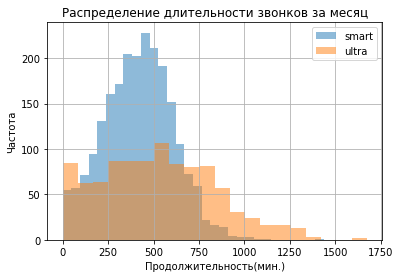

In [18]:
ax = df[df['tariff']=='smart']['calls_duration'].hist(bins = 30, alpha = 0.5)
df[df['tariff']=='ultra']['calls_duration'].hist(ax=ax, bins = 20, alpha = 0.5)
plt.title("Распределение длительности звонков за месяц")
plt.legend(['smart', 'ultra'])
plt.xlabel("Продолжительность(мин.)")
plt.ylabel("Частота")
df[df['tariff']=='ultra']['calls_duration'].describe()
df[df['tariff']=='ultra']['calls_duration'].describe()

print('Длительности звонков за месяц по тарифу "смарт"\n', df[df['tariff']=='smart']['calls_duration'].describe())
print('Длительности звонков за месяц по тарифу "ультра"\n', df[df['tariff']=='ultra']['calls_duration'].describe())

Из гистограмм видно, что распределение для тарифа смарт нормальное(распределение Пуассона стремящееся к нормальному) и немного скошено влево, а для тарифа ультра необычно много значений около нуля, распредение тоже нормальное(распределение Пуассона стремящееся к нормальному), скошенности не замечаю. Медианы очень близки к средним значениям, значит огромного количества выбросов нет. Проделаем то же самое с распределениями кол-ва сообщений и объема интернет-трафика:

Количество сообщений за месяц по тарифу "смарт"
 count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_count, dtype: float64
Количество сообщений за месяц по тарифу "ультра"
 count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_count, dtype: float64


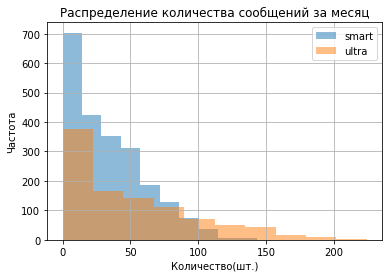

In [19]:
ax = df[df['tariff']=='smart']['message_count'].hist(bins = 10, alpha = 0.5)
df[df['tariff']=='ultra']['message_count'].hist(ax=ax, bins = 10, alpha = 0.5)
plt.title("Распределение количества сообщений за месяц")
plt.legend(['smart', 'ultra'])
plt.xlabel("Количество(шт.)")
plt.ylabel("Частота")
df[df['tariff']=='ultra']['message_count'].describe()
df[df['tariff']=='ultra']['message_count'].describe()

print('Количество сообщений за месяц по тарифу "смарт"\n', df[df['tariff']=='smart']['message_count'].describe())
print('Количество сообщений за месяц по тарифу "ультра"\n', df[df['tariff']=='ultra']['message_count'].describe())

Здесь у нас явно видно два распределения Пуассона, по тарифу ультра можно заметить хвост, который переваливает за значение в 200 сообщений в месяц. Это отражается и на среднем, можно заметить, что медиана меньше среднего для тарифа ультра значительно. Переходим к интернет-трафику.

Количество сообщений за месяц по тарифу "смарт"
 count    2229.000000
mean       15.848817
std         5.739821
min         0.000000
25%        12.361328
50%        16.143555
75%        19.597656
max        37.705078
Name: gb_used, dtype: float64
Количество сообщений за месяц по тарифу "ультра"
 count    985.000000
mean      19.030177
std        9.859685
min        0.000000
25%       11.508789
50%       18.871094
75%       26.233398
max       48.622070
Name: gb_used, dtype: float64


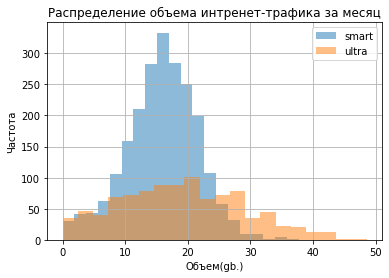

In [20]:
ax = df[df['tariff']=='smart']['gb_used'].hist(bins = 20, alpha = 0.5)
df[df['tariff']=='ultra']['gb_used'].hist(ax=ax, bins = 20, alpha = 0.5)
plt.title("Распределение объема интренет-трафика за месяц")
plt.legend(['smart', 'ultra'])
plt.xlabel("Объем(gb.)")
plt.ylabel("Частота")
df[df['tariff']=='ultra']['gb_used'].describe()
df[df['tariff']=='ultra']['gb_used'].describe()

print('Количество сообщений за месяц по тарифу "смарт"\n', df[df['tariff']=='smart']['gb_used'].describe())
print('Количество сообщений за месяц по тарифу "ультра"\n', df[df['tariff']=='ultra']['gb_used'].describe())

По гистограммам видно, что распределение для тарифа смарт нормальное(распределение Пуассона стремящееся к нормальному) и немного скошено вправо, а для тарифа ультра распредение тоже нормальное(распределение Пуассона стремящееся к нормальному), скошено немного влево. Медианы очень близки к средним значениям, значит огромного количества выбросов нет.

### Вывод анализа и описания данных

Все параметры распределений описаны, из необычного можно отметить большое кол-во абонентов на тарифе ультра с околонулевой продолжительностью за месяц, возможно они общаются больше по смс или через интернет. Определили типы распределений, в основном это распределения Пуассона или они же, но стремящиеся к нормальным. Провели визуальное сравнение распределений для обоих тарифов.

## Проверка гипотез и пояснения

Проверим первую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, альтернативная будет отрицанием нулевой. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind() 
Нулевая гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» равны.
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [21]:
sample_1 = df[df['tariff']=='smart']['fee']
sample_2 = df[df['tariff']=='ultra']['fee']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


In [22]:
print(sample_1.describe())
print(sample_2.describe())

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: fee, dtype: float64
count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: fee, dtype: float64


Видимо средняя выручка пользователей тарифов «Ультра» и «Смарт» и правда отличаются.

Проверим вторую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевую гипотезу формулируем так, чтобы использовать знак равенства, альтернативную же через отрицание нулевой. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind() Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается(или не равна) от выручки пользователей из других регионов.

In [23]:
sample_1 = df[df['city']=='Москва']['fee']
sample_2 = df[df['city']!='Москва']['fee']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Похоже, что средняя выручка от пользователей из Москвы скорее всего не отличается от пользователей из других городов.

### Вывод проверки гипотез

Мы проверили две гипотезы, одну получилось отвергнуть, а другую нет. В обоих проверках был критический уровень значимости равен 5%, если его поменять в первой проверке, то результат останется тем же, потому что p-значение в ней почти нулевое. Во второй проверке p-значение наоборот очень большое, результат опять бы не поменялся, если бы мы взяли немного другой критический уровень значимости(больше 10% вроде бы не берут обычно).

## Общий вывод

Мы проделали большую работу с данными, сначала изучили каждую таблицу отдельно, исправили в них некоторые ошибки(тип дат и округлили значения). Потом вытащили в таблицах звонков, интернета и сообщений месяц, сгруппировали все таблицы в одну большую по месяцу и номеру пользователя. Добавили значение выручки по каждому пользователю и изучили, как выглядят распределения продолжительности звонков, количества сообщений и объема интернет-трафика. Напоследок мы проверили две гипотезы о средних значениях выручки для разных тарифов и для населенного пункта(Москва и не Москва). Пришли к таким выводам: средняя выручка от пользователей из Москвы скорее всего не отличается от пользователей из других городов и средняя выручка пользователей тарифов «Ультра» и «Смарт» и правда отличаются. Ответить однозначно на вопрос названия проекта(Определение перспективного тарифа для телеком-компании) не получается, но можно заметить, что в имеющейся выборке средний и медианный чеки за месяц абонента тарифа "Ультра" больше, чем абонента тарифа "Смарт", но и выборка по тарифу смарт больше в 2,5 раза, поэтому это просто заметка для себя, которую можно использовать для проверки следующих гипотез.